# Sprint 機械学習フロー

## 【問題1】クロスバリデーション

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '/Users/toyodasatomi/Desktop/DIC/data/application_train.csv'
df = pd.read_csv(path)

In [3]:
display(df.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#ダミー変数化
import category_encoders as ce

#エンコードしたい列を指定　# Eoncodeしたい列をリストで指定。もちろん複数指定可能。
#全て
list_cols = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN'
            ,'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE'
            ,'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE'
            ,'FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']
# OneHotEncodeしたい列を指定。Nullや不明の場合の補完方法も指定。
ce_ohe = ce.OneHotEncoder(cols=list_cols,handle_unknown='impute')
# pd.DataFrameをそのまま突っ込む
df_onehot = ce_ohe.fit_transform(df)

In [5]:
#全部０で埋める
df_onehot_nonan = df_onehot.fillna(0)

In [6]:
#Xとyにデータ入れる
X = df_onehot_nonan.drop("TARGET", axis = 1)
y = df_onehot_nonan.iloc[:,1]

In [15]:
display(X.head())
display(y.head())

,SK_ID_CURR,NAME_CONTRACT_TYPE_1,NAME_CONTRACT_TYPE_2,CODE_GENDER_1,CODE_GENDER_2,CODE_GENDER_3,FLAG_OWN_CAR_1,FLAG_OWN_CAR_2,FLAG_OWN_REALTY_1,FLAG_OWN_REALTY_2,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,1,0,0,1,0,1,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [ ]:
#sklearn.model_selection.KFoldのサンプルコード
''''
Examples

>>>
>>> import numpy as np
>>> from sklearn.model_selection import KFold
>>> X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
>>> y = np.array([1, 2, 3, 4])
>>> kf = KFold(n_splits=2)
>>> kf.get_n_splits(X)
2
>>> print(kf)  
KFold(n_splits=2, random_state=None, shuffle=False)
>>> for train_index, test_index in kf.split(X):
...    print("TRAIN:", train_index, "TEST:", test_index)
...    X_train, X_test = X[train_index], X[test_index]
...    y_train, y_test = y[train_index], y[test_index]
TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]
Methods
''''

In [20]:
from sklearn.model_selection import KFold

In [9]:
#インスタンス化
kf = KFold(n_splits=2)

In [10]:
#やってみる：クロスバリデーターの分割反復の数を返します
kf.get_n_splits(X)

2

In [12]:
#やってみる　スプリット実行　
#入れる変数が必要
a,b=kf.split(X)

In [13]:
print(a)

(array([153756, 153757, 153758, ..., 307508, 307509, 307510]), array([     0,      1,      2, ..., 153753, 153754, 153755]))


In [25]:
KFold(n_splits=2, random_state=None, shuffle=False)

KFold(n_splits=2, random_state=None, shuffle=False)

参考  
https://blog.amedama.jp/entry/2018/06/21/235951

In [14]:
#splitではデータフレームのインデックスを抽出できるみたい
for train_index, test_index in kf.split(X, y):
    train_df = df_onehot.iloc[train_index]
    test_df = df_onehot.iloc[test_index]
    print("train_index:", train_index, "test_index:", test_index)

train_index: [153756 153757 153758 ... 307508 307509 307510] test_index: [     0      1      2 ... 153753 153754 153755]
train_index: [     0      1      2 ... 153753 153754 153755] test_index: [153756 153757 153758 ... 307508 307509 307510]


In [28]:
print(train_index)

[     0      1      2 ... 205005 205006 205007]


In [15]:
display(train_df.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_1,NAME_CONTRACT_TYPE_2,CODE_GENDER_1,CODE_GENDER_2,CODE_GENDER_3,FLAG_OWN_CAR_1,FLAG_OWN_CAR_2,FLAG_OWN_REALTY_1,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,1,0,1,0,0,1,0,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,1,1,0,0,0,1,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,1,0,0,1,0,1,0,1,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
''''
sklearn.model_selection.cross_val_score
Examples

>>>
>>> from sklearn import datasets, linear_model
>>> from sklearn.model_selection import cross_val_score
>>> diabetes = datasets.load_diabetes()
>>> X = diabetes.data[:150]
>>> y = diabetes.target[:150]
>>> lasso = linear_model.Lasso()
>>> print(cross_val_score(lasso, X, y, cv=3))  
[0.33150734 0.08022311 0.03531764]
''''

SyntaxError: EOL while scanning string literal (<ipython-input-38-cff7efad1523>, line 14)

In [7]:
# 交差検証
from sklearn.model_selection import cross_val_score
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
# SVM
from sklearn.svm import LinearSVC
# 決定木
from sklearn.tree import  DecisionTreeClassifier
# k-NN
from sklearn.neighbors import  KNeighborsClassifier
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.metrics import roc_auc_score

In [ ]:
#終わらない
#models = [LogisticRegression(),LinearSVC(),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors = 6),RandomForestClassifier()]
scores = {}
for model in models:
    scores[str(model).split('(')[0]] = cross_val_score(model, X, y, cv=5)
df_scores = pd.DataFrame(scores)

In [67]:
#cvを数字指定
models = [RandomForestClassifier()]
scores = {}
for model in models:
    scores[str(model).split('(')[0]] = cross_val_score(model, X, y, cv=2,scoring='roc_auc')
df_scores = pd.DataFrame(scores)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [68]:
display(df_scores)

,RandomForestClassifier
0,0.561223
1,0.607978


In [84]:
#cvをインスタンスで指定
models = [RandomForestClassifier()]
scores = {}
for model in models:
    scores[str(model).split('(')[0]] = cross_val_score(model, X, y, cv=kf,scoring='roc_auc')
df_scores = pd.DataFrame(scores)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [85]:
display(df_scores)

,RandomForestClassifier
0,0.609041
1,0.617293


## 【問題2】グリッドサーチ

sklearn.model_selection.GridSearchCV

Examples

>>>
>>> from sklearn import svm, datasets
>>> from sklearn.model_selection import GridSearchCV
>>> iris = datasets.load_iris()
>>> parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
>>> svc = svm.SVC(gamma="scale")
>>> clf = GridSearchCV(svc, parameters, cv=5)
>>> clf.fit(iris.data, iris.target)
...                             
GridSearchCV(cv=5, error_score=...,
       estimator=SVC(C=1.0, cache_size=..., class_weight=..., coef0=...,
                     decision_function_shape='ovr', degree=..., gamma=...,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=...,
                     verbose=False),
       iid=..., n_jobs=None,
       param_grid=..., pre_dispatch=..., refit=..., return_train_score=...,
       scoring=..., verbose=...)
>>> sorted(clf.cv_results_.keys())
...                             
['mean_fit_time', 'mean_score_time', 'mean_test_score',...
 'param_C', 'param_kernel', 'params',...
 'rank_test_score', 'split0_test_score',...
 'split2_test_score', ...
 'std_fit_time', 'std_score_time', 'std_test_score']

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

参考：  
https://blog.amedama.jp/entry/2017/09/05/221037

In [23]:
from sklearn.model_selection import GridSearchCV

In [12]:
def main():
    # 優れたハイパーパラメータを見つけたいモデル
    clf = DecisionTreeClassifier()

    # 試行するパラメータを羅列する
    params = {
        'max_depth': list(range(1, 20)),
        'criterion': ['gini', 'entropy'],
    }
    grid_search = GridSearchCV(clf,  # 分類器を渡す
                               param_grid=params,  # 試行してほしいパラメータを渡す
                               cv=10,  # 10-Fold CV で汎化性能を調べる
                               )

    # グリッドサーチで優れたハイパーパラメータを探す
    grid_search.fit(X, y)

    print(grid_search.best_score_)  # 最も良かったスコア
    print(grid_search.best_params_)  # 上記を記録したパラメータの組み合わせ

#### 関数終わらなかったから一旦それぞれで実行

In [40]:
clf = DecisionTreeClassifier()

In [44]:
# 試行するパラメータとその値
params = {
        'max_depth': list(range(1, 20)),
        'criterion': ['gini', 'entropy'],
}

In [69]:
# グリッドサーチする。
grid_search = GridSearchCV(clf,  # 分類器を渡す
                               param_grid=params,  # 試行してほしいパラメータを渡す
                               cv=3,scoring='roc_auc') # 10-Fold CV で汎化性能を調べる

In [73]:
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,

参考:グリットサーチの結果確認方法  
https://www.pynote.info/entry/sklearn-grid-search-cv

In [78]:
#best_clf = grid_search.best_estimator_
#print('score: {:.2%}'.format(best_clf.score(X, y))) 

In [81]:
from pprint import pprint
pprint(grid_search.cv_results_)

cv_result = pd.DataFrame(grid_search.cv_results_)

{'mean_fit_time': array([ 1.96289062,  2.84831142,  3.83667843,  5.45137493,  5.61042595,
        7.50240636,  8.59300065,  9.04312634, 10.17886162, 12.85689592,
       15.98131069, 16.99116278, 18.77810605, 18.78292267, 18.98106432,
       22.0993189 , 24.553629  , 24.99065272, 31.12113388,  2.85601624,
        2.52803365,  3.80237826,  5.56648501,  7.23089918,  8.10569406,
       10.37443225, 12.36495209, 13.02636894, 13.8431507 , 16.4672722 ,
       16.50469645, 17.59974154, 20.00292977, 22.03358142, 21.59485356,
       20.81186183, 31.07043831, 33.48317957]),
 'mean_score_time': array([0.33533971, 0.31088765, 0.35028489, 0.31990631, 0.31165202,
       0.32848072, 0.340837  , 0.30622164, 0.31175629, 0.37568402,
       0.42333674, 0.36688232, 0.36187657, 0.38457068, 0.31967338,
       0.55854567, 0.56329838, 0.3857336 , 0.70259221, 0.5063866 ,
       0.32547967, 0.34042597, 0.34272122, 0.34358446, 0.45000148,
       0.49778565, 0.40383387, 0.32766644, 0.35579904, 0.40183647,
       0

In [18]:
#display(cv_result)

In [83]:
cv_result.loc[grid_search.best_index_]

mean_fit_time                                         8.10569
std_fit_time                                          0.29079
mean_score_time                                      0.450001
std_score_time                                        0.16867
param_criterion                                       entropy
param_max_depth                                             6
params               {'criterion': 'entropy', 'max_depth': 6}
split0_test_score                                    0.708246
split1_test_score                                    0.708435
split2_test_score                                    0.713052
mean_test_score                                      0.709911
std_test_score                                     0.00222232
rank_test_score                                             1
Name: 24, dtype: object

In [77]:
print('clf.best_params_', grid_search.best_params_)  # clf.best_params_ {'kernel': 'linear', 'C': 1}

clf.best_params_ {'criterion': 'entropy', 'max_depth': 6}


## 【問題3】Kernelからの調査

#### アイディアの列挙

①変数重要度の上位にくる変数を絞ってモデルの作成を実施してみる  
参考：https://www.kaggle.com/codename007/home-credit-complete-eda-feature-importance  
7.Feature Importance using Ramdom Forest  
変数トップ6
<EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,DAY_BIRTH,DAY_EMPLOYED>  

②TARGETと相関の高い変数のみでモデルの作成を実施してみる  
参考：https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering  
（ただし、このカーネルでは相関の低い変数を削除している)

③利用するモデルをいいスコアを出している人のものに変えてみる  
参考 https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering  
https://www.kaggle.com/jsaguiar/lightgbm-with-simple-features  
    LGBMClassifier  

④変数同士を組み合わせて新しい変数を作ってみる  
参考:https://www.kaggle.com/jsaguiar/lightgbm-with-simple-features  
年齢やら、労働やら、年収やら、それに対するローンの金額など  

## 【問題4】高い汎化性能のモデル作成

#### RandomForestClassifierとLinearSVCの2モデルで検証

### 基準をXの全変数を利用するモデルの精度にする

In [46]:
models = [RandomForestClassifier()]
scores = {}
for model in models:
    scores[str(model).split('(')[0]] = cross_val_score(model, X, y, cv=5,scoring='roc_auc')
df_scores_base_r = pd.DataFrame(scores)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: T

In [51]:
display(df_scores_base_r)

,RandomForestClassifier
0,0.625362
1,0.622117
2,0.621703
3,0.614009
4,0.620622


### ①変数重要度の上位にくる変数を絞ってモデルの作成を実施してみる

In [24]:
X_1=X[['EXT_SOURCE_2','EXT_SOURCE_3','EXT_SOURCE_1','DAYS_BIRTH','DAYS_EMPLOYED']]

In [47]:
models =[LinearSVC()]
scores = {}
for model in models:
    scores[str(model).split('(')[0]] = cross_val_score(model, X_1, y, cv=5,scoring='roc_auc')
df_scores_1s = pd.DataFrame(scores)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

In [40]:
models = [RandomForestClassifier()]
scores = {}
for model in models:
    scores[str(model).split('(')[0]] = cross_val_score(model, X_1, y, cv=5,scoring='roc_auc')
df_scores_1r = pd.DataFrame(scores)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: T

In [49]:
display(df_scores_1s)

,LinearSVC
0,0.479480
1,0.518983
2,0.591451
3,0.580907
4,0.583249


In [47]:
display(df_scores_1r)

,RandomForestClassifier
0,0.630152
1,0.634162
2,0.631386
3,0.629085
4,0.631269


### ①結論：0.01くらいスコア上がった

### ②TARGETと相関の高い変数のみでモデルの作成を実施してみる 

In [44]:
df_crr = df.corr()
df_crr.sort_values('TARGET').head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
EXT_SOURCE_3,0.000222,-0.178919,-0.042710,-0.030229,0.043516,0.030752,0.047717,-0.006001,-0.205478,0.113434,...,-0.016152,-0.002590,-0.013837,-0.013058,-0.001193,-0.007190,-0.021258,-0.007856,-0.025131,-0.071449
EXT_SOURCE_2,0.002342,-0.160472,-0.018015,0.060925,0.131228,0.125804,0.139367,0.198924,-0.091996,-0.020767,...,0.001874,0.003256,0.000614,-0.007236,-0.004077,0.000553,0.001507,0.051981,-0.002849,-0.021984
EXT_SOURCE_1,0.000082,-0.155317,-0.138470,0.026232,0.168429,0.119398,0.175502,0.099997,-0.600610,0.289848,...,-0.025739,0.005131,-0.005102,-0.019208,-0.003963,-0.005087,-0.001801,0.030820,-0.003631,0.006562
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.064223,-0.066838,-0.104332,-0.064842,-0.003980,-0.615864,1.000000,...,-0.040396,-0.010040,-0.010135,-0.008396,-0.004735,0.000472,0.003072,-0.034457,0.015345,0.049988
FLOORSMAX_AVG,0.004851,-0.044003,-0.009705,0.060171,0.103296,0.130174,0.108512,0.322652,0.001634,-0.015970,...,0.012230,0.000900,-0.002702,-0.005814,0.003101,0.002946,-0.000050,0.046762,-0.000841,-0.019750


相関係数 0.05(絶対値)以上の変数  
EXT_SOURCE_3　EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH  
REGION_RATING_CLIENT_W_CITY REGION_RATING_CLIENT  
DAYS_LAST_PHONE_CHANGE DAYS_ID_PUBLISH REG_CITY_NOT_WORK_CITY  

In [8]:
X_2=X[['EXT_SOURCE_2','EXT_SOURCE_3','EXT_SOURCE_1','DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY'
       ,'REGION_RATING_CLIENT','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','REG_CITY_NOT_WORK_CITY']]

In [31]:
models = [RandomForestClassifier()]
scores = {}
for model in models:
    scores[str(model).split('(')[0]] = cross_val_score(model, X_2, y, cv=5,scoring='roc_auc')
df_scores_2 = pd.DataFrame(scores)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: T

In [27]:
models =[LinearSVC()]
scores = {}
for model in models:
    scores[str(model).split('(')[0]] = cross_val_score(model, X_2, y, cv=5,scoring='roc_auc')
df_scores_2s = pd.DataFrame(scores)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

In [29]:
display(df_scores_2s)

,LinearSVC
0,0.584465
1,0.424172
2,0.591367
3,0.586200
4,0.425027


In [42]:
display(df_scores_2)

,RandomForestClassifier
0,0.633612
1,0.638588
2,0.633895
3,0.629869
4,0.637837


### ③利用するモデルをいいスコアを出している人のものに変えてみる
(比較のために①のデータを使ってみる)

In [20]:
import lightgbm as lgb
#エラーで実行できない
#エラー解消したけど、Warningが治らない・・・
#brew install libompしたら治った

In [24]:
models =[LGBMClassifier()]
scores = {}
for model in models:
    scores[str(model).split('(')[0]] = cross_val_score(model, X_1, y, cv=5,scoring='roc_auc')
df_scores_1l = pd.DataFrame(scores)

In [18]:
from lightgbm import LGBMClassifier

//anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [25]:
display(df_scores_1l)

,LGBMClassifier
0,0.731151
1,0.733630
2,0.727659
3,0.733026
4,0.736603


#### かなり精度が上がった

（データを②にして実施してみる）

In [27]:
models =[LGBMClassifier()]
scores = {}
for model in models:
    scores[str(model).split('(')[0]] = cross_val_score(model, X_2, y, cv=5,scoring='roc_auc')
df_scores_2l = pd.DataFrame(scores)

In [33]:
display(df_scores_2l)

,LGBMClassifier
0,0.730940
1,0.732689
2,0.727169
3,0.735186
4,0.736467


### ③結論：総じて精度上がった

### ④変数同士を組み合わせて新しい変数を作ってみる

In [9]:
#変数を増やすためのDFを作成
X_C= X

In [10]:
#年齢と労働日数
X_C['DAYS_EMPLOYED_PERC'] = X_C['DAYS_EMPLOYED'] / X_C['DAYS_BIRTH']
#年収と
X_C['INCOME_CREDIT_PERC'] = X_C['AMT_INCOME_TOTAL'] / X_C['AMT_CREDIT']

X_C['INCOME_PER_PERSON'] = X_C['AMT_INCOME_TOTAL'] / X_C['CNT_FAM_MEMBERS']
X_C['ANNUITY_INCOME_PERC'] = X_C['AMT_ANNUITY'] / X_C['AMT_INCOME_TOTAL']
X_C['PAYMENT_RATE'] = X_C['AMT_ANNUITY'] / X_C['AMT_CREDIT']

In [11]:
display(X_C.head())

,SK_ID_CURR,NAME_CONTRACT_TYPE_1,NAME_CONTRACT_TYPE_2,CODE_GENDER_1,CODE_GENDER_2,CODE_GENDER_3,FLAG_OWN_CAR_1,FLAG_OWN_CAR_2,FLAG_OWN_REALTY_1,FLAG_OWN_REALTY_2,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,100002,1,0,1,0,0,1,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.067329,0.498036,202500.0,0.121978,0.060749
1,100003,1,0,0,1,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.070862,0.208736,135000.0,0.132217,0.027598
2,100004,0,1,1,0,0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.011814,0.500000,67500.0,0.100000,0.050000
3,100006,1,0,0,1,0,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.159905,0.431748,67500.0,0.219900,0.094941
4,100007,1,0,1,0,0,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.152418,0.236842,121500.0,0.179963,0.042623


#### 比較のために①のデータセットに追加した変数を加えたものをデータセットとして利用する

In [11]:
X_1_C=X_C[['SK_ID_CURR','EXT_SOURCE_2','EXT_SOURCE_3','EXT_SOURCE_1','DAYS_BIRTH','DAYS_EMPLOYED'
      ,'DAYS_EMPLOYED_PERC','INCOME_CREDIT_PERC','INCOME_PER_PERSON','ANNUITY_INCOME_PERC'
        ,'PAYMENT_RATE']]

In [13]:
display(X_1_C.head())

,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,0.262949,0.139376,0.083037,-9461,-637,0.067329,0.498036,202500.0,0.121978,0.060749
1,0.622246,0.000000,0.311267,-16765,-1188,0.070862,0.208736,135000.0,0.132217,0.027598
2,0.555912,0.729567,0.000000,-19046,-225,0.011814,0.500000,67500.0,0.100000,0.050000
3,0.650442,0.000000,0.000000,-19005,-3039,0.159905,0.431748,67500.0,0.219900,0.094941
4,0.322738,0.000000,0.000000,-19932,-3038,0.152418,0.236842,121500.0,0.179963,0.042623


In [35]:
models =[LinearSVC()]
scores = {}
for model in models:
    scores[str(model).split('(')[0]] = cross_val_score(model, X_1_C, y, cv=5,scoring='roc_auc')
df_scores_1sc = pd.DataFrame(scores)

#inf のエラーが発生する

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

In [36]:
models = [RandomForestClassifier()]
scores = {}
for model in models:
    scores[str(model).split('(')[0]] = cross_val_score(model, X_1_C, y, cv=5,scoring='roc_auc')
df_scores_1rc = pd.DataFrame(scores)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: T

In [37]:
display(df_scores_1sc)

,LinearSVC
0,0.566712
1,0.513533
2,0.522142
3,0.513061
4,0.538766


In [38]:
display(df_scores_1rc)

,RandomForestClassifier
0,0.643930
1,0.647353
2,0.644814
3,0.648487
4,0.648469


#### ①の結果と比較

In [43]:
display(df_scores_1r)

,RandomForestClassifier
0,0.630366
1,0.630562
2,0.624335
3,0.632672
4,0.634328


In [50]:
display(df_scores_1s)

,LinearSVC
0,0.479480
1,0.518983
2,0.591451
3,0.580907
4,0.583249


### ④結論：ランダムフォレストはスコアが上がったが、SVCはスコアが下がった。

In [ ]:
#試しにLGBMも試してみる
models =[LGBMClassifier()]
scores = {}
for model in models:
    scores[str(model).split('(')[0]] = cross_val_score(model, X_2, y, cv=5,scoring='roc_auc')
df_scores_2l = pd.DataFrame(scores)

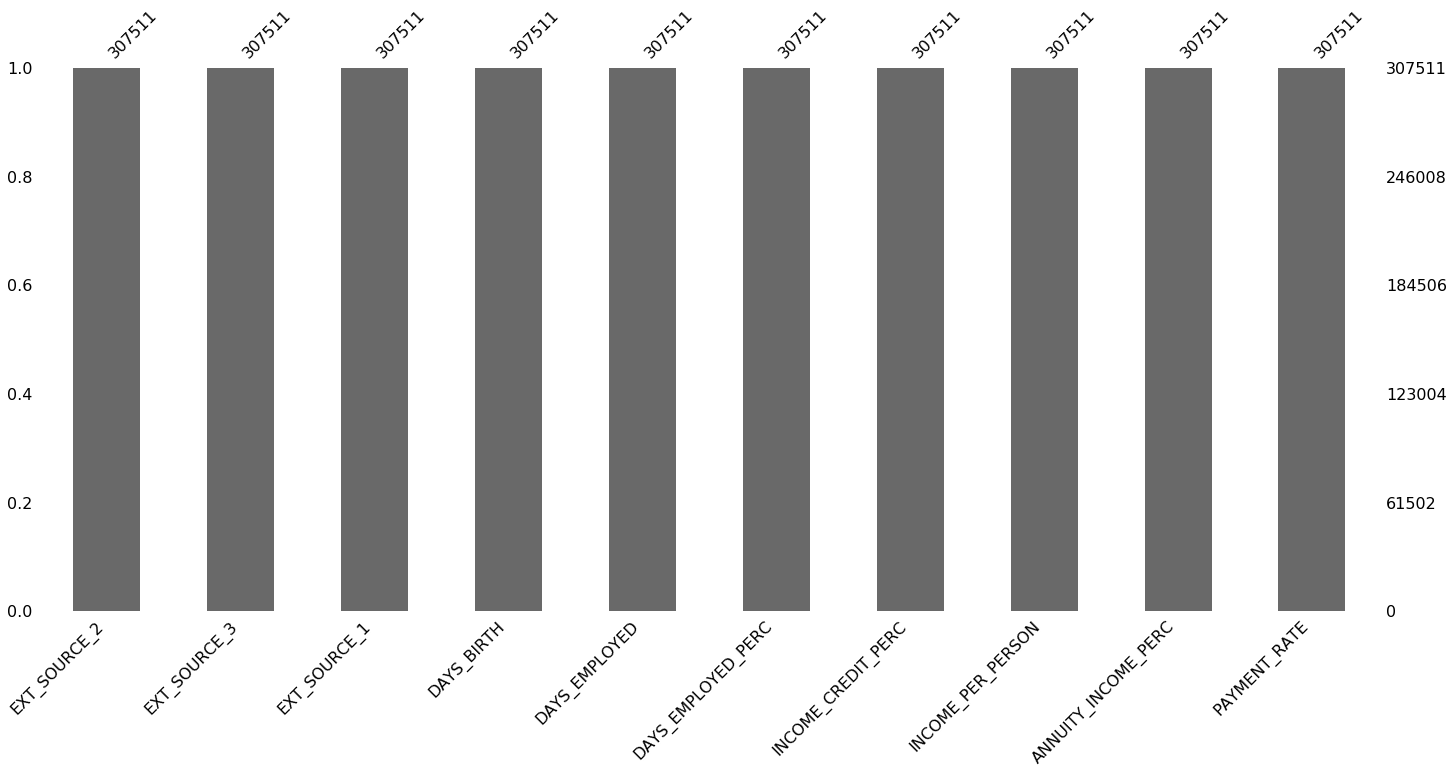

In [31]:
import missingno as msno
msno.bar(X_1_C)
#null原因じゃない

In [33]:
print(np.isinf(X_1_C)=='True')

        EXT_SOURCE_2  EXT_SOURCE_3  EXT_SOURCE_1  DAYS_BIRTH  DAYS_EMPLOYED  \
0              False         False         False       False          False   
1              False         False         False       False          False   
2              False         False         False       False          False   
3              False         False         False       False          False   
4              False         False         False       False          False   
5              False         False         False       False          False   
6              False         False         False       False          False   
7              False         False         False       False          False   
8              False         False         False       False          False   
9              False         False         False       False          False   
10             False         False         False       False          False   
11             False         False         False    

//anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [22]:
#inf(無限大野数)を0にリプレイス
X_1_C = X_1_C.replace([np.inf, -np.inf], 0)
#エラー解決

# 【問題5】最終的なモデルの選定

最終的にこれは良いというモデルを選び、推定した結果をKaggleに提出してスコアを確認してください。どういったアイデアを取り入れ、どの程度のスコアになったかを記載してください。

predictだけ実施すると思うが、OneHotEncodeは必要かと思うが、nullの補完は必要なのか・・・・？両方で試してみる。

In [12]:
path_test = '/Users/toyodasatomi/Downloads/application_test.csv'

In [13]:
df_test = pd.read_csv(path_test)

In [14]:
list_cols = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN'
            ,'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE'
            ,'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE'
            ,'FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']
# OneHotEncodeしたい列を指定。Nullや不明の場合の補完方法も指定。
ce_ohe = ce.OneHotEncoder(cols=list_cols,handle_unknown='impute')
# pd.DataFrameをそのまま突っ込む
df_onehot_test = ce_ohe.fit_transform(df_test)

In [15]:
#0うめ
df_onehot_nonan_test = df_onehot_test.fillna(0)

In [63]:
display(df_onehot_nonan_test.head())

,SK_ID_CURR,NAME_CONTRACT_TYPE_1,NAME_CONTRACT_TYPE_2,CODE_GENDER_1,CODE_GENDER_2,FLAG_OWN_CAR_1,FLAG_OWN_CAR_2,FLAG_OWN_REALTY_1,FLAG_OWN_REALTY_2,CNT_CHILDREN_1,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,100001,1,0,1,0,1,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.121044,0.237342,67500.0,0.152300,0.036147
1,100005,1,0,0,1,1,0,1,0,1,...,0.0,0.0,0.0,0.0,3.0,0.247398,0.444409,49500.0,0.175455,0.077973
2,100013,1,0,0,1,0,1,1,0,1,...,0.0,0.0,0.0,1.0,4.0,0.222477,0.305308,101250.0,0.344578,0.105202
3,100028,1,0,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,3.0,0.133515,0.200000,78750.0,0.155614,0.031123
4,100038,1,0,0,1,0,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.168021,0.287770,60000.0,0.178150,0.051266


In [64]:
display(X_1_C_test.head())

,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,0.789654,0.159520,0.752614,-19241,-2329,0.121044,0.237342,67500.0,0.152300,0.036147
1,0.291656,0.432962,0.564990,-18064,-4469,0.247398,0.444409,49500.0,0.175455,0.077973
2,0.699787,0.610991,0.000000,-20038,-4458,0.222477,0.305308,101250.0,0.344578,0.105202
3,0.509677,0.612704,0.525734,-13976,-1866,0.133515,0.200000,78750.0,0.155614,0.031123
4,0.425687,0.000000,0.202145,-13040,-2191,0.168021,0.287770,60000.0,0.178150,0.051266


In [16]:
#変数追加
df_onehot_nonan_test['DAYS_EMPLOYED_PERC'] = df_onehot_nonan_test['DAYS_EMPLOYED'] / df_onehot_nonan_test['DAYS_BIRTH']
#年収と
df_onehot_nonan_test['INCOME_CREDIT_PERC'] = df_onehot_nonan_test['AMT_INCOME_TOTAL'] / df_onehot_nonan_test['AMT_CREDIT']

df_onehot_nonan_test['INCOME_PER_PERSON'] = df_onehot_nonan_test['AMT_INCOME_TOTAL'] / df_onehot_nonan_test['CNT_FAM_MEMBERS']
df_onehot_nonan_test['ANNUITY_INCOME_PERC'] = df_onehot_nonan_test['AMT_ANNUITY'] / df_onehot_nonan_test['AMT_INCOME_TOTAL']
df_onehot_nonan_test['PAYMENT_RATE'] = df_onehot_nonan_test['AMT_ANNUITY'] / df_onehot_nonan_test['AMT_CREDIT']


In [20]:
X_1_C_test=df_onehot_nonan_test[['SK_ID_CURR','EXT_SOURCE_2','EXT_SOURCE_3','EXT_SOURCE_1','DAYS_BIRTH','DAYS_EMPLOYED'
      ,'DAYS_EMPLOYED_PERC','INCOME_CREDIT_PERC','INCOME_PER_PERSON','ANNUITY_INCOME_PERC'
        ,'PAYMENT_RATE']]

In [21]:
#inf(無限大野数)を0にリプレイス
X_1_C_test = X_1_C_test.replace([np.inf, -np.inf], 0)

In [23]:
#ランダムフォレストのモデルで実施してみる
#一番スコアの良かったパターン③のX_1_C, yで
rf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
#学習
rf.fit(X_1_C, y)
#予測
Y_pred_rf = rf.predict(X_1_C_test)
#prob
y_pred_proba = rf.predict_proba(X_1_C_test)

In [71]:
display(y_pred_proba)

array([[0.92588223, 0.07411777],
       [0.91304601, 0.08695399],
       [0.94465696, 0.05534304],
       ...,
       [0.92570476, 0.07429524],
       [0.93331477, 0.06668523],
       [0.90033049, 0.09966951]])

In [73]:
display(Y_pred_rf)

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
a=df_onehot_nonan_test['SK_ID_CURR'].values

In [26]:
a.shape

(48744,)

In [27]:
#提出時にint32でって怒られる
a.dtype

dtype('int64')

In [28]:
aa = np.array(a, dtype = 'int32')

In [29]:
print(aa)

[100001 100005 100013 ... 456223 456224 456250]


In [30]:
#int32に変換したけど、csv出力すると「.0」がID後に入り込んでいることがそもそも問題？
#結局「ID」に「.0」が入っていたことが原因のエラーだった。
aa.dtype

dtype('int32')

In [88]:
print(a)

[100001 100005 100013 ... 456223 456224 456250]


In [32]:
b=y_pred_proba[:,1]

In [33]:
b.shape

(48744,)

In [34]:
c = np.stack([aa, b],1)

In [35]:
c.T.shape

(2, 48744)

In [37]:
c.dtype

dtype('float64')

In [100]:
print(c)

[[1.00001000e+05 7.41177717e-02]
 [1.00005000e+05 8.69539863e-02]
 [1.00013000e+05 5.53430441e-02]
 ...
 [4.56223000e+05 7.42952366e-02]
 [4.56224000e+05 6.66852280e-02]
 [4.56250000e+05 9.96695088e-02]]


In [36]:
#CSVで出力する
import csv
header = [ 'SK_ID_CURR', 'TARGET']

with open('/Users/toyodasatomi/Desktop/DIC/data/file.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(c)  

＜Kaggle提出結果＞  
Private Score　0.68623  
Public Score　0.70017